# Logistic Regression

## 1. Data description
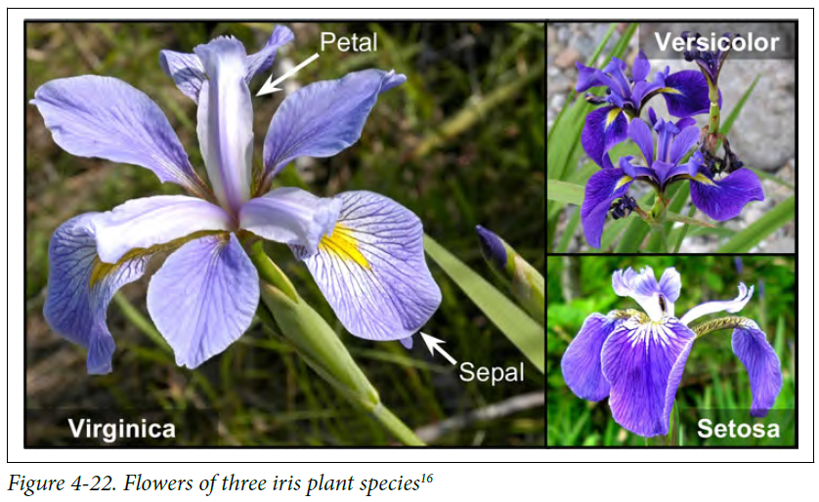

In [ ]:
#Import the datasets from sklearn module
from sklearn import datasets
iris=datasets.load_iris()

#The iris data contain following information
list(iris.keys())

In [ ]:
#DESCR represents the description of datasets
print(iris.DESCR)

In [ ]:
#The 4 features of iris data:
print(iris.feature_names)

In [ ]:
#The names of 3 iris classes:
print(iris.target_names)

In [ ]:
print("Class 0\n", iris.data[:50])
print("\nClass 1\n",iris.data[50:100])
print("\nClass 2\n",iris.data[100:150])

In [ ]:
#The Class is represented 0, 1, and 2
print(iris.target)

## 2. Logistic Regression

In [ ]:
# Import the functions for logistic regression from sklearn module
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

### 2.1 2-class logistic regression (using a single feature)

In [ ]:
#2 class example:Iris-Virginica (Class 2) vs. else. OvA (One vs. All) model
y = (iris["target"] == 2).astype(np.int)
#Only one feature:petal width (feature 3)
X = iris["data"][:,3:]

In [ ]:
#Define classifier name "log_reg"
log_reg = LogisticRegression()
#Estimate the parameter Theta
log_reg.fit(X,y)

In [ ]:
#Plot 0 to 3 with 1000 points
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

#Plot the the probability of class using petal width
plt.plot(X_new,y_proba[:,1],"g-",label = "Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label = "Not-Iris-Virginica")

#Visualize the classifier results using the original datasets
plt.scatter(X,y,c = -y,cmap = "RdBu",vmin = -1.2, vmax = .2)

plt.xlabel('Petal width')
plt.ylabel("Probability")
plt.legend()

In [ ]:
np.sum(log_reg.predict(X)!=y)

### 2.2 2-class logistic regression (using 2 features)

In [ ]:
#2 class example:Iris-Virginica (Class 2) vs. else OvA (One vs. All) model
y = (iris["target"] == 2).astype(np.int)
#Use 2 features:petal width (feature 2) and Petal length (feature 3)
X = iris["data"][:,2:]

In [ ]:
#Define classifier name "log_reg"
log_reg = LogisticRegression()
#Estimate the parameter Theta
log_reg.fit(X,y)

In [ ]:
#2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
#Define size of figure
plt.figure(1, figsize = (4, 3))
#To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z, cmap = "RdBu"
               ,vmin = -.2, vmax = 1.2)
#Plot Datapoints with corresponding color
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
#Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [ ]:
np.sum(log_reg.predict(X)!=y)

### 2.3 Softmax regression (multinomial regression)

In [ ]:
#Classify all 3 classes by multinomial regression
y=iris.target
#Use 2 features : petal width and petal length
X=iris["data"][:,2:]

In [ ]:
#Define classifier name "softmax_reg "
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
#Estimate the parameter Theta
softmax_reg.fit(X,y)

In [ ]:
#2-dimensional coordinate.
xx, yy = np.meshgrid(np.arange(0, 8, 0.01), np.arange(0, 3.0, 0.01))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z = Z.reshape(xx.shape)
#Define size of figure
plt.figure(1, figsize=(4, 3))
#To see decision boundary, predicted value for each points are colored
plt.pcolormesh(xx, yy, Z, cmap="RdBu"
               ,vmin=-.2, vmax=1.2)
#Plot Datapoints with corresponding color
plt.scatter(X[:,0],X[:,1],c=y,cmap="RdBu"
            ,vmin=-.2, vmax=1.2
            ,edgecolor="white", linewidth=1)
#Labeling axis
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [ ]:
np.sum(softmax_reg.predict(X)!=y)

## Task 1
### Repeat the above softmax regression for feature pair (0,3)

## Task 2
### Repeat the above softmax regression while using all 4 features.